# :oncoming_automobile: Car Price Analytics
## Hypothesis 01: Fuel Type 

|Field|Description|
|-----|-----------|
|**Author:** |Robert Steven Elliott|
|**Course:** |Code Institute – Data Analytics with AI Bootcamp|
|**Project Type:** |Hackathon 1|
|**Team Name:** | tbc |
|**Date:** | November 2025| 

---
### **Objectives**
- Test the hypothesis: *Fuel type impacts car price*.  
- Analyse whether diesel cars are more expensive than petrol cars.  
- Perform correlation and statistical tests (Pearson, Spearman, t-test, Mann–Whitney).  
- Visualise price distribution across fuel types using boxplots.  
- Interpret statistical results and summarise findings.

### **Inputs**
- `data/final/car_prices.csv`

### **Outputs**
- Correlation coefficients and p-values for each test.  
- Boxplot visualisation comparing fuel types.  
- Written conclusion on hypothesis outcome.
        
### **Additional Comments**
- Run this notebook top-down only. Do not edit `data/` files directly.
- Ensure all required libraries are installed before execution. 

---

## Ingnore Warnings

This project uses alot of old library versions so we will turn of future warnings

Suppressing `FutureWarning` messages for readability, as older library versions are used for compatibility with Streamlit.

In [1]:
import warnings # import warnings module
warnings.simplefilter(action='ignore', category=FutureWarning) # ignore future warnings

---

## Change Working Directory

In [ ]:
import os # import os module
PROJECT_ROOT = os.path.join(os.getcwd(), "..") # define project root directory
os.chdir(PROJECT_ROOT) # change working directory to project root
assert os.path.exists("data/final/car_prices.csv"), "❌ Dataset not found." # assert dataset exists
print("✅ Working directory set to project root:", os.getcwd()) # print confirmation message

✅ Working directory set to project root: /home/robert/Projects/Car-Price-Analytics


---

## Load Libraries and Data

In [ ]:
import pandas as pd # importing pandas for data manipulation
import numpy as np # importing numpy for numerical operations
import seaborn as sns # importing seaborn for data visualization
import matplotlib.pyplot as plt # importing matplotlib for plotting
from scipy.stats import ttest_ind, mannwhitneyu # importing statistical tests

try: # Load dataset
    df = pd.read_csv("data/final/car_prices.csv") # read dataset
    print(f"✅ Loaded dataset: {df.shape[0]} rows, {df.shape[1]} columns") # print dataset shape
except FileNotFoundError: # handle file not found error
    print("❌ Dataset not found. Please check your working directory.")

✅ Data loaded successfully.


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,highwaympg,price,manufacturer,model,compressionratio_bin,price_per_hp,power_to_weight_ratio,engine_efficiency,avg_mpg,price_per_mpg
0,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,27,13495.0,alfa-romero,giulia,Low,121.576577,0.043564,0.853846,24.0,562.291667
1,3,petrol,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,27,16500.0,alfa-romero,stelvio,Low,148.648649,0.043564,0.853846,24.0,687.500000
2,1,petrol,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,26,16500.0,alfa-romero,Quadrifoglio,Low,107.142857,0.054552,1.013158,22.5,733.333333
3,2,petrol,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,30,13950.0,audi,100 ls,Standard,136.764706,0.043646,0.935780,27.0,516.666667
4,2,petrol,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,22,17450.0,audi,100ls,Low,151.739130,0.040722,0.845588,20.0,872.500000


---

## Data Type Restoration

when loading from CSV, categorical columns were re-cast to the category dtype to maintain consistency with the ETL pipeline and improve plotting performance.

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns # Identify categorical columns
for col in categorical_columns: # Re-cast each categorical column to 'category' dtype
    df[col] = df[col].astype('category') # Convert to category dtype
print("✅ Data types after restoration:") # Confirmation message
print(df.dtypes) # Display the data types of all columns

✅ Data types after restoration:
symboling                   int64
fueltype                 category
aspiration               category
doornumber               category
carbody                  category
drivewheel               category
wheelbase                 float64
carlength                 float64
carwidth                  float64
carheight                 float64
curbweight                  int64
enginetype               category
cylindernumber           category
enginesize                  int64
fuelsystem               category
boreratio                 float64
stroke                    float64
compressionratio          float64
horsepower                  int64
peakrpm                     int64
citympg                     int64
highwaympg                  int64
price                     float64
manufacturer             category
model                    category
compressionratio_bin     category
price_per_hp              float64
power_to_weight_ratio     float64
engine_efficienc

## Hypothesis

$$
\begin{align}
H_0&: \text{Fuel type does not affect car price} \\
H_1&: \text{Fuel type affects car price}
\end{align}
$$

We aim to determine whether diesel cars tend to be more expensive than petrol cars.

### Data Inspection

In [ ]:
df.isna().sum() # Check for missing values
df['fueltype'].value_counts() # Check unique values in 'fueltype' column



fueltype
petrol    185
diesel     20
Name: count, dtype: int64

Observation: There are more petrol cars than diesel cars — this may influence variance in results.

### Summary Statistics

In [7]:
fuel_summary = df.groupby('fueltype')['price'].describe()[['count', 'mean', 'std', 'min', 'max']]
fuel_summary

,count,mean,std,min,max
fueltype,,,,,
diesel,20.0,15838.1500,7759.843713,7099.0,31600.0
petrol,185.0,12999.7982,7984.409306,5118.0,45400.0


---

### Visualise Distribution

AttributeError: module 'matplotlib.pyplot' has no attribute 'caption'

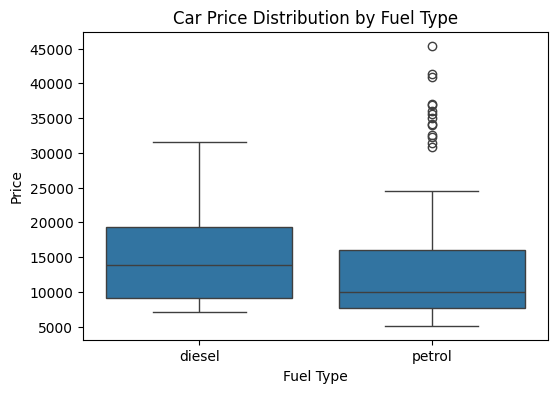

In [ ]:
plt.figure(figsize=(6,4)) # Set figure size
sns.boxplot(x='fueltype', y='price', data=df) # Create boxplot
plt.title('Car Price Distribution by Fuel Type') # Set plot title
plt.xlabel('Fuel Type') # Set x-axis label
plt.ylabel('Price') # Set y-axis label
plt.show() # Display the plot

Figure 1: Distribution of car prices by fuel type. Diesel vehicles show slightly higher median prices.”

The boxplot allows visual comparison of price spread and outliers. It has already been investigates that the outliers are for hi-end cars such as BMW, Jaguar, etc.



---

### Encode Categorical Variable

In [9]:
df['fueltype_encoded'] = df['fueltype'].map({'petrol': 0, 'diesel': 1})
df[['fueltype', 'fueltype_encoded']].head()

,fueltype,fueltype_encoded
0,petrol,0
1,petrol,0
2,petrol,0
3,petrol,0
4,petrol,0


---

### Pearson Correlation

Purpose: Measures the linear relationship between two continuous variables.

#### Why it’s used here:

Although fueltype is a categorical variable, encoding it numerically (petrol = 0, diesel = 1) allows us to use Pearson as a point-biserial correlation, which is mathematically equivalent.

This gives a sense of whether there is a linear trend — e.g. if higher fueltype_encoded (diesel = 1) corresponds to higher car prices.

#### Assumptions:

The dependent variable (price) is continuous and approximately normally distributed within each group.

The relationship (if any) is linear.

#### Interpretation:

A positive correlation → diesel cars tend to be more expensive.

A negative correlation → petrol cars tend to be more expensive.

A value near 0 → no linear relationship.

In [10]:
pearson_corr = df[['fueltype_encoded', 'price']].corr(method='pearson').iloc[0, 1] # Calculate Pearson correlation
print(f"Pearson correlation between fuel type and price: {pearson_corr}") # Print correlation value

Pearson correlation between fuel type and price: 0.1056794823597391


**Interpretation:**  
The Pearson correlation coefficient between fuel type and price is **0.106**,  
indicating a very weak positive linear relationship.  
This suggests that diesel cars are, on average, slightly more expensive than petrol cars,  
but fuel type alone explains very little of the variation in car prices.

---

### Spearman Correlation

Purpose: Measures the monotonic relationship between two ranked variables.

#### Why it’s used here:

It’s a non-parametric alternative to Pearson — it does not assume normality or linearity.

It’s useful for verifying whether prices increase consistently with fuel type, even if not perfectly linear.

#### Assumptions:

Variables can be ranked (ordinal or continuous).

The relationship between variables is monotonic (one increases as the other increases or decreases).

#### Interpretation:

A positive value → higher-ranked fuel types (diesel) generally correspond to higher prices.

A negative value → higher-ranked fuel types correspond to lower prices.

Value near 0 → no monotonic relationship.

In [11]:
spearman_corr = df[['fueltype_encoded', 'price']].corr(method='spearman').iloc[0, 1]
print(f"Spearman correlation between fuel type and price: {spearman_corr}")

Spearman correlation between fuel type and price: 0.13973701825670282


#### Interpretation:
  
The Spearman correlation coefficient between fuel type and price is **0.140**,  
showing a weak positive monotonic relationship.  
This suggests that as the fuel type changes from petrol to diesel, car prices tend to increase slightly.  
However, the association is weak, implying that other factors—such as engine size, horsepower, and brand—have a far greater influence on price.


---

### Independent Samples t-test

Purpose: Compares the means of two independent groups.

#### Why it’s used here:

We have two independent groups (petrol vs diesel cars).

We want to know if the average prices differ significantly.

It’s a parametric test — suitable when price distributions are approximately normal and have similar variances.

#### Assumptions:

Two groups are independent.

Each group’s prices are approximately normally distributed.

Homogeneity of variance (can be relaxed with equal_var=False, as we do).

#### Interpretation:

p < 0.05 → reject H₀ → mean prices differ significantly by fuel type.

p ≥ 0.05 → fail to reject H₀ → no significant difference in mean prices.

In [12]:
# Split the data
petrol_prices = df[df['fueltype'] == 'petrol']['price'] # Prices of petrol cars
diesel_prices = df[df['fueltype'] == 'diesel']['price'] # Prices of diesel cars

# Perform t-test
t_stat, p_value = ttest_ind(petrol_prices, diesel_prices, equal_var=False) # Welch's t-test
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

T-test results: t-statistic = -1.5495186834799177, p-value = 0.1345832569726233


**Interpretation:**  
The independent samples t-test produced a t-statistic of **–1.55** with a **p-value of 0.135**.  
Since the p-value is greater than 0.05, we **fail to reject the null hypothesis (H₀)**.  
This means there is **no statistically significant difference** in mean car prices between petrol and diesel vehicles.  

Although diesel cars show slightly higher average prices,  
the difference is not strong enough to be considered statistically meaningful at the 95% confidence level.

---

### Mann–Whitney U Test

Purpose: Non-parametric alternative to the t-test — compares distributions or medians of two groups.

#### Why it’s used here:

If the price data are not normally distributed or contain outliers, the t-test assumptions may not hold.

The Mann–Whitney test doesn’t rely on normality — it compares the ranked prices instead of raw means.

It’s more robust for skewed or unevenly distributed data (like car prices).

#### Assumptions:

Independent samples.

The dependent variable is at least ordinal (can be ranked).

#### Interpretation:

p < 0.05 → reject H₀ → price distributions differ significantly between fuel types.

p ≥ 0.05 → fail to reject H₀ → distributions are similar.

In [13]:
u_stat, u_pval = mannwhitneyu(diesel_prices, petrol_prices, alternative='two-sided') # Perform Mann-Whitney U test
print(f"Mann-Whitney U test results: U-statistic = {u_stat}, p-value = {u_pval}") # Print test results

Mann-Whitney U test results: U-statistic = 2353.0, p-value = 0.04616736846226526


**Interpretation:**  
The Mann–Whitney U test yielded a **U-statistic of 2353.0** with a **p-value of 0.046**.  
Since the p-value is less than 0.05, we **reject the null hypothesis (H₀)** and conclude that  
there is a **statistically significant difference in car price distributions** between petrol and diesel vehicles.  

This non-parametric result suggests that diesel cars generally have higher prices than petrol cars,  
even though the difference detected by the t-test was not significant.  
The Mann–Whitney test, being more robust to non-normality and outliers,  
supports a small but meaningful effect of fuel type on price.

### Summary

| Test               | Statistic | p-value | Interpretation                          |
| ------------------ | --------- | ------- | --------------------------------------- |
| **Pearson**        | 0.106     | —       | Very weak linear correlation            |
| **Spearman**       | 0.140     | —       | Weak monotonic relationship             |
| **t-test**         | –1.55     | 0.135   | No significant mean difference          |
| **Mann–Whitney U** | 2353.0    | 0.046   | Significant difference in distributions |


### Overall Conclusion

While both correlation coefficients (Pearson and Spearman) indicate a very weak positive relationship,
and the t-test found no significant difference in mean prices,
the Mann–Whitney U test suggests a statistically significant difference in price distributions,
implying that diesel cars tend to be priced slightly higher than petrol cars.

This supports a partial rejection of the null hypothesis (H₀) —
fuel type does appear to influence car price to a small but statistically detectable extent.